In [23]:
# imports
import pandas as pd 
import matplotlib.pyplot as plt
from scipy.stats import linregress
import scipy.stats as stats
import numpy as np

In [24]:
#How does the activity level correlate to average heart rate?
# Need dataframe from heartrate_seconds_merged.csv and dailyIntensities_merged

# data about heartrate 
heartrate = pd.read_csv(r'Resources\Fitbit_data\heartrate_seconds_merged.csv')
heartrate = heartrate.drop(columns=['Time'])

# data about intensity of activity
intensity = pd.read_csv(r'Resources\Fitbit_data\dailyIntensities_merged.csv')
intensity = intensity.drop(columns=['SedentaryActiveDistance','LightActiveDistance','ModeratelyActiveDistance','VeryActiveDistance','ActivityDay'])

In [25]:
#merge the heart rate data with the activity level data
act_level_avg_heart_rate = pd.merge(heartrate,intensity,how='inner',on='Id')
# drop any null values
act_level_avg_heart_rate.dropna()
# rename column for legibility
act_level_avg_heart_rate.rename(columns={'Value':'BeatsPerMin'},inplace=True)
act_level_avg_heart_rate.head()

,Id,BeatsPerMin,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes
0,2022484408,97,1157,227,14,42
1,2022484408,97,1100,292,5,43
2,2022484408,97,1148,257,3,32
3,2022484408,97,1122,282,9,27
4,2022484408,97,1237,151,11,41


In [26]:
#create summary table to show each participants average activity and average heart rate for length of experiment
summary_act_heart_rate = act_level_avg_heart_rate.groupby('Id').mean()
summary_act_heart_rate

,BeatsPerMin,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes
Id,,,,,
2022484408,80.236860,1112.580645,257.451613,19.354839,36.290323
2026352035,93.776305,689.419355,256.645161,0.258065,0.096774
2347167796,76.722792,687.166667,252.500000,20.555556,13.500000
4020332650,82.300577,1237.258065,76.935484,5.354839,5.193548
4388161847,66.132998,836.677419,229.354839,20.354839,23.161290
4558609924,81.673947,1093.612903,284.967742,13.709677,10.387097
5553957443,68.633093,668.354839,206.193548,13.000000,23.419355
5577150313,69.564516,754.433333,147.933333,29.833333,87.333333
6117666160,83.749891,796.285714,288.357143,2.035714,1.571429


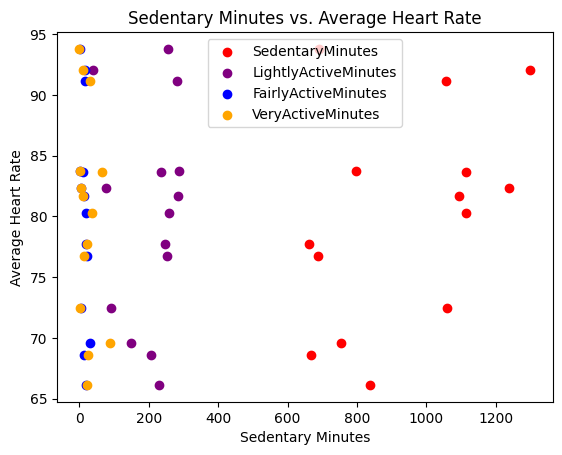

In [27]:
plt.scatter(summary_act_heart_rate['SedentaryMinutes'],summary_act_heart_rate['BeatsPerMin'],c='red')
plt.scatter(summary_act_heart_rate['LightlyActiveMinutes'],summary_act_heart_rate['BeatsPerMin'],c='purple')
plt.scatter(summary_act_heart_rate['FairlyActiveMinutes'],summary_act_heart_rate['BeatsPerMin'],c='blue')
plt.scatter(summary_act_heart_rate['VeryActiveMinutes'],summary_act_heart_rate['BeatsPerMin'],c='orange')
plt.title('Sedentary Minutes vs. Average Heart Rate')
plt.xlabel('Sedentary Minutes')
plt.ylabel('Average Heart Rate')
plt.legend(['SedentaryMinutes','LightlyActiveMinutes','FairlyActiveMinutes','VeryActiveMinutes'])
plt.show()

In [28]:
# How does the amount of sleep affect weight?
# Need dataframe from sleepDay_merged and weightLogInfo_merged

sleepDay = pd.read_csv(r'Resources\Fitbit_data\sleepDay_merged.csv')
sleepDay = sleepDay.drop(columns=['SleepDay','TotalSleepRecords','TotalTimeInBed'])
weightLog = pd.read_csv(r'Resources\Fitbit_data\weightLogInfo_merged.csv')
weightLog = weightLog.drop(columns=['Fat','WeightKg','Date','WeightPounds','IsManualReport','LogId'])
avg_weight = weightLog.groupby('Id').mean()

In [29]:
#merge the total minutes asleep with the BMI data
sleep_weight = pd.merge(sleepDay,weightLog,how='inner',on='Id')
sleep_weight.dropna()
unique_ids = sleep_weight['Id'].unique()
#convert minutes of sleep to hours
sleep_weight['HoursSleep'] = sleep_weight['TotalMinutesAsleep']/60
#drop the minutes column
sleep_weight = sleep_weight.drop(columns=['TotalMinutesAsleep'])
sleep_weight

,Id,BMI,HoursSleep
0,1503960366,22.650000,5.450000
1,1503960366,22.650000,5.450000
2,1503960366,22.650000,6.400000
3,1503960366,22.650000,6.400000
4,1503960366,22.650000,6.866667
...,...,...,...
1083,6962181067,23.889999,8.600000
1084,6962181067,24.350000,8.600000
1085,6962181067,24.240000,8.600000
1086,6962181067,24.170000,8.600000


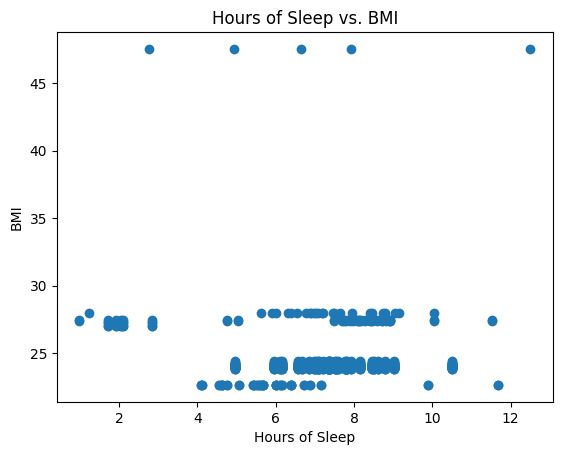

In [30]:
# plot each sleep entry with the corresponding BMI
plt.scatter(sleep_weight['HoursSleep'],sleep_weight['BMI'])
plt.title('Hours of Sleep vs. BMI')
plt.xlabel('Hours of Sleep')
plt.ylabel('BMI')
plt.show()

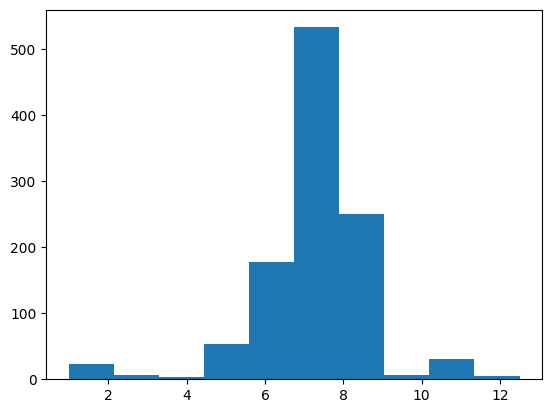

In [31]:
# see if data is normally distributed
plt.hist(sleep_weight['HoursSleep'])
plt.show()
# it's in a bell shape, so we can use the t-test

In [32]:
sample_data = sleep_weight.sample(n = 100) 
stats.ttest_1samp(sample_data['HoursSleep'], sleep_weight['HoursSleep'].mean())

TtestResult(statistic=1.3040797747434967, pvalue=0.19523032796793638, df=99)

In [33]:
# set index to participant ID
sleep_weight = sleep_weight.reset_index().set_index('Id')
sleep_weight.drop(columns=['index'])

,BMI,HoursSleep
Id,,
1503960366,22.650000,5.450000
1503960366,22.650000,5.450000
1503960366,22.650000,6.400000
1503960366,22.650000,6.400000
1503960366,22.650000,6.866667
...,...,...
6962181067,23.889999,8.600000
6962181067,24.350000,8.600000
6962181067,24.240000,8.600000


In [34]:
#create summary table to show each participants average amount of sleep and BMI
sleep_weight_summary = sleep_weight[["HoursSleep", "BMI"]].groupby("Id").mean()
sleep_weight_summary

,HoursSleep,BMI
Id,,
1503960366,6.004667,22.650000
1927972279,6.950000,47.540001
4319703577,7.944231,27.415000
4558609924,2.126667,27.214000
5577150313,7.200000,28.000000
6962181067,7.466667,24.028000


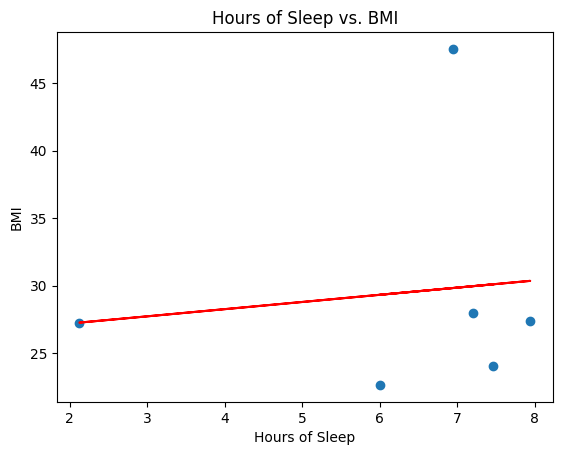

In [35]:
# plot each participant's average amount of sleep vs. their average BMI
x_values = sleep_weight_summary['HoursSleep']
y_values = sleep_weight_summary['BMI']
plt.scatter(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")
plt.title('Hours of Sleep vs. BMI')
plt.xlabel('Hours of Sleep')
plt.ylabel('BMI')
plt.show()

In [36]:
stats.pearsonr(x_values,y_values)

PearsonRResult(statistic=0.12477618055251569, pvalue=0.8138070552901597)

In [37]:
#How does the activity level affect number of calories burned?
# Need dataframe from dailyActivity 
activity = pd.read_csv(r'Resources\Fitbit_data\dailyActivity_merged.csv')
activity = activity.drop(columns=['ActivityDate','TotalSteps','TotalDistance','TrackerDistance','LoggedActivitiesDistance',
                                  'VeryActiveDistance','ModeratelyActiveDistance','LightActiveDistance','SedentaryActiveDistance'])
activity.dropna()
activity.head()

,Id,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,25,13,328,728,1985
1,1503960366,21,19,217,776,1797
2,1503960366,30,11,181,1218,1776
3,1503960366,29,34,209,726,1745
4,1503960366,36,10,221,773,1863


In [38]:
#create summary table to show each participants average activity and daily calories burned
activity_summary = activity.groupby("Id").mean()
activity_summary.head()

,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
Id,,,,,
1503960366,38.709677,19.161290,219.935484,848.161290,1816.419355
1624580081,8.677419,5.806452,153.483871,1257.741935,1483.354839
1644430081,9.566667,21.366667,178.466667,1161.866667,2811.300000
1844505072,0.129032,1.290323,115.451613,1206.612903,1573.483871
1927972279,1.322581,0.774194,38.580645,1317.419355,2172.806452


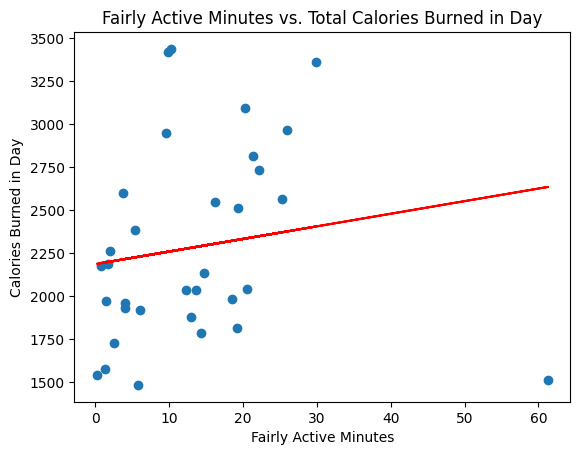

In [64]:
plt.scatter(activity_summary['FairlyActiveMinutes'],activity_summary['Calories'])
plt.xlabel('Fairly Active Minutes')
plt.ylabel('Calories Burned in Day')
plt.title('Fairly Active Minutes vs. Total Calories Burned in Day')
x_values = activity_summary['FairlyActiveMinutes']
y_values = activity_summary['Calories']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")
plt.show()

In [67]:
stats.pearsonr(activity_summary['FairlyActiveMinutes'],activity_summary['Calories'])

PearsonRResult(statistic=0.15767990750913138, pvalue=0.3808253606464178)

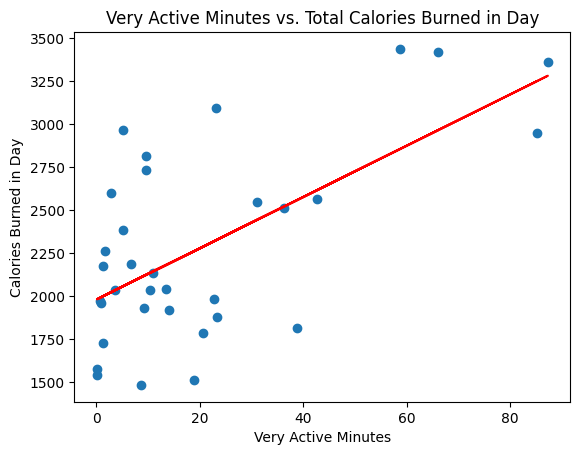

In [62]:
plt.scatter(activity_summary['VeryActiveMinutes'],activity_summary['Calories'])
plt.xlabel('Very Active Minutes')
plt.ylabel('Calories Burned in Day')
plt.title('Very Active Minutes vs. Total Calories Burned in Day')
x_values = activity_summary['VeryActiveMinutes']
y_values = activity_summary['Calories']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")
plt.show()

In [66]:
stats.pearsonr(activity_summary['VeryActiveMinutes'],activity_summary['Calories'])

PearsonRResult(statistic=0.6299661878041602, pvalue=8.545827735010941e-05)

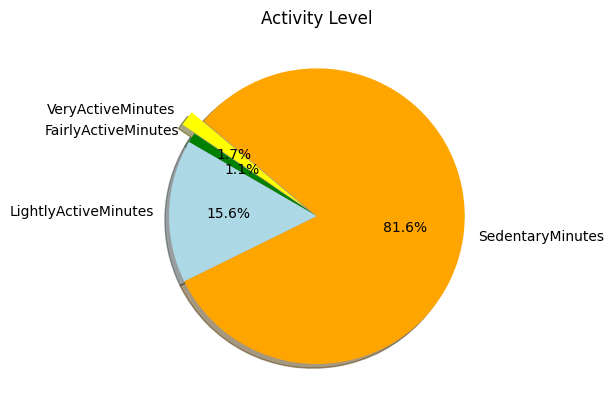

In [40]:
vam = activity_summary['VeryActiveMinutes'].mean()
fam = activity_summary['FairlyActiveMinutes'].mean()
lam = activity_summary['LightlyActiveMinutes'].mean()
sm =  activity_summary['SedentaryMinutes'].mean()


activity_level_pie = [vam,fam,lam,sm]
act_level_pie = ['VeryActiveMinutes','FairlyActiveMinutes','LightlyActiveMinutes','SedentaryMinutes']
colors = ['yellow','green','lightblue','orange']
explode = (0.1,0,0,0,)
# Tell matplotlib to create a pie chart based upon the above data
plt.pie(activity_level_pie,explode=explode, labels=act_level_pie, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
# Create axes which are equal so we have a perfect circle
plt.title('Activity Level')
# Save an image of our chart and print the final product to the screen
plt.show()